# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [10]:
# Your code here - load the dataset
import pandas as pd
data = pd.read_csv("ames.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Visually inspect `ames` (it's ok if you can't see all of the columns).

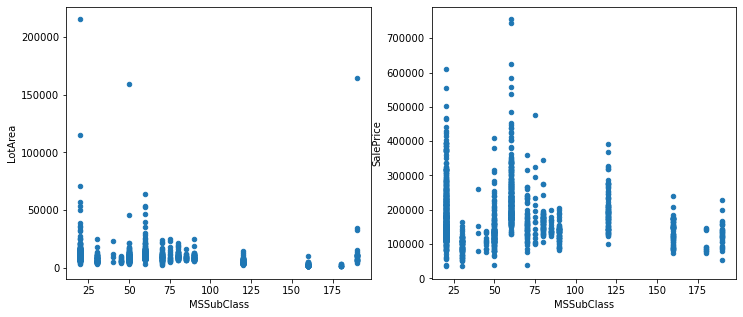

In [11]:
# Your code here
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

data.plot.scatter(x="MSSubClass", y="LotArea", ax=ax1)
data.plot.scatter(x="MSSubClass", y="SalePrice", ax=ax2);

Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [26]:
# Your code here - drop columns with missing data
data.dropna(axis= 'columns')

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

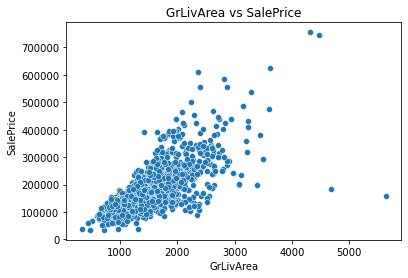

In [ ]:
# Your code here - continuous numeric predictor
import matplotlib.pyplot as plt
import seaborn as sns

# Continuous Numeric Predictor: GrLivArea
sns.scatterplot(x=data['GrLivArea'], y=data['SalePrice'])
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()


### Discrete Numeric Predictor

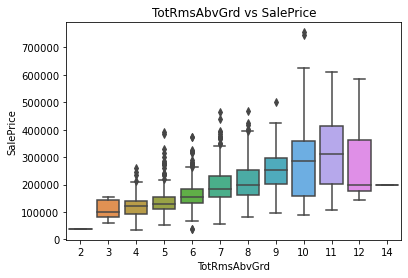

In [29]:
# Your code here - discrete numeric predictor
# Discrete Numeric Predictor: TotRmsAbvGrd
sns.boxplot(x=data['TotRmsAbvGrd'], y=data['SalePrice'])
plt.title('TotRmsAbvGrd vs SalePrice')
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.show()


### String Categorical Predictor

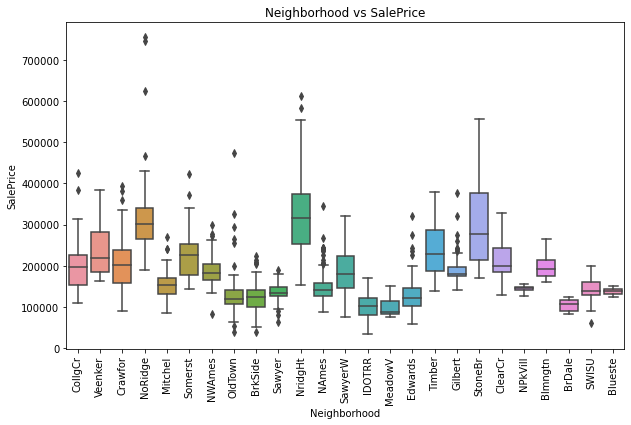

In [32]:
# Your code here - string categorical predictor
# String Categorical Predictor: Neighborhood
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Neighborhood'], y=data['SalePrice'])
plt.title('Neighborhood vs SalePrice')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.xticks(rotation=90)
plt.show()


### Discrete Categorical Predictor

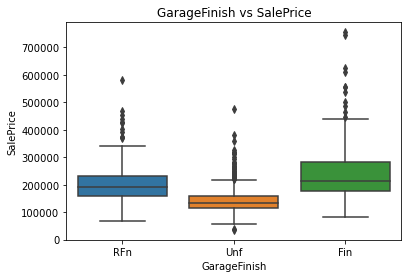

In [33]:
# Your code here - discrete categorical predictor
# Discrete Categorical Predictor: GarageFinish
sns.boxplot(x=data['GarageFinish'], y=data['SalePrice'])
plt.title('GarageFinish vs SalePrice')
plt.xlabel('GarageFinish')
plt.ylabel('SalePrice')
plt.show()


## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [118]:
# Your code here - prepare X and y, including one-hot encoding
y = data["SalePrice"]
X = data[["GrLivArea", "Neighborhood", "TotRmsAbvGrd"]]

X = pd.get_dummies(X, columns=["Neighborhood"], drop_first=True, dtype=int) 

In [18]:
# Your answer here - which category or categories were dropped?


In [119]:
# Your code here - build a regression model and display results
import statsmodels.api as sm

model = sm.OLS(y,X)
results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              1196.
Date:                Tue, 18 Feb 2025   Prob (F-statistic):                        0.00
Time:                        22:08:31   Log-Likelihood:                         -17596.
No. Observations:                1460   AIC:                                  3.524e+04
Df Residuals:                    1434   BIC:                                  3.538e+04
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

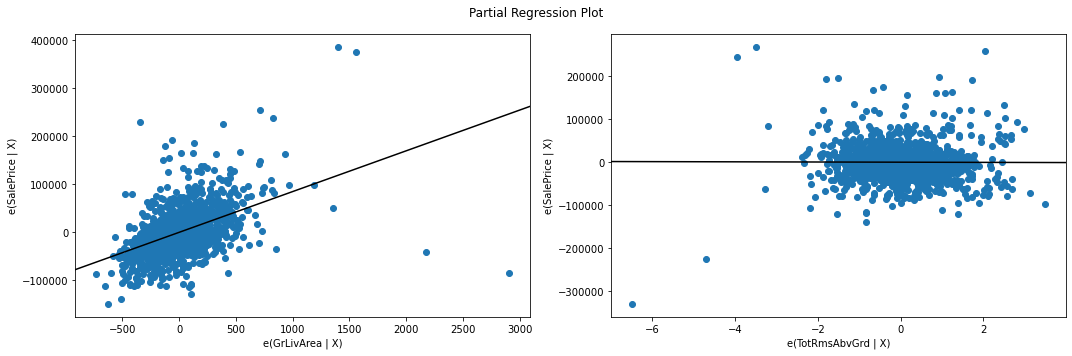

In [130]:
# Your code here - create partial regression plots
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(results, exog_idx=["GrLivArea", "TotRmsAbvGrd"], fig=fig)
plt.tight_layout()
plt.show()

## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [133]:
# Your code here - calculate an error-based metric
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, results.predict())

28258.825193285615

## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [22]:
# Your answer here


## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [23]:
# Your code here

## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.